### Objectives
Implementation of SVM
<br>
Comparing performance of SVM with tree based classifier

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [39]:
# Load dataset
df = pd.read_csv("diabetes.csv")

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [40]:
# Simple data preparation
# Prepare features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features for SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print("Data prepared successfully!")

Training set: (614, 8)
Test set: (154, 8)
Data prepared successfully!


In [41]:
# SVM Implementation
print("SVM CLASSIFIERS")

# Linear SVM 
svm_linear = SVC(
    kernel='linear',           # Linear kernel
    C=1.0,                    # Regularization parameter (default)
    gamma='scale',            # Kernel coefficient (default)
    degree=3,                 # Degree for polynomial kernel (default)
    coef0=0.0,                # Independent term in kernel function (default)
    shrinking=True,           # Use shrinking heuristic (default)
    probability=False,        # Probability estimates (default)
    tol=1e-3,                 # Tolerance for stopping criterion (default)
    cache_size=200,           # Kernel cache size in MB (default)
    class_weight=None,        # Weights associated with classes (default)
    verbose=False,            # Verbose output (default)
    max_iter=-1,              # Hard limit on iterations (default)
    decision_function_shape='ovr',  # Decision function shape (default)
    break_ties=False,         # Break ties (default)
    random_state=42
)

svm_linear.fit(X_train_scaled, y_train)
linear_pred = svm_linear.predict(X_test_scaled)
linear_accuracy = accuracy_score(y_test, linear_pred)

print(f"\n1. Linear SVM Accuracy: {linear_accuracy:.4f}")

# RBF SVM 
svm_rbf = SVC(
    kernel='rbf',
    random_state=42
)

svm_rbf.fit(X_train_scaled, y_train)
rbf_pred = svm_rbf.predict(X_test_scaled)
rbf_accuracy = accuracy_score(y_test, rbf_pred)

print(f"2. RBF SVM Accuracy: {rbf_accuracy:.4f}")

# Store results
svm_results = {
    'Linear SVM': linear_accuracy,
    'RBF SVM': rbf_accuracy
}

SVM CLASSIFIERS

1. Linear SVM Accuracy: 0.7597
2. RBF SVM Accuracy: 0.7338


In [42]:
# Tree-based Classifier
print("\nTREE-BASED CLASSIFIER")

# Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=10)
dt_classifier.fit(X_train, y_train)  # No scaling needed for trees
dt_pred = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)

print(f"\nDecision Tree Accuracy: {dt_accuracy:.4f}")

# Store results
tree_results = {
    'Decision Tree': dt_accuracy
}


TREE-BASED CLASSIFIER

Decision Tree Accuracy: 0.7532


In [43]:
# Performance Comparison
print("\nPERFORMANCE COMPARISON")

# Calculate detailed metrics for all models
models_data = []

# Linear SVM metrics
linear_precision = precision_score(y_test, linear_pred)
linear_recall = recall_score(y_test, linear_pred)
linear_f1 = f1_score(y_test, linear_pred)

models_data.append({
    'Model': 'Linear SVM',
    'Accuracy': linear_accuracy,
    'Precision': linear_precision,
    'Recall': linear_recall,
    'F1-Score': linear_f1
})

# RBF SVM metrics
rbf_precision = precision_score(y_test, rbf_pred)
rbf_recall = recall_score(y_test, rbf_pred)
rbf_f1 = f1_score(y_test, rbf_pred)

models_data.append({
    'Model': 'RBF SVM',
    'Accuracy': rbf_accuracy,
    'Precision': rbf_precision,
    'Recall': rbf_recall,
    'F1-Score': rbf_f1
})

# Decision Tree metrics
dt_precision = precision_score(y_test, dt_pred)
dt_recall = recall_score(y_test, dt_pred)
dt_f1 = f1_score(y_test, dt_pred)

models_data.append({
    'Model': 'Decision Tree',
    'Accuracy': dt_accuracy,
    'Precision': dt_precision,
    'Recall': dt_recall,
    'F1-Score': dt_f1
})

# Create comparison DataFrame
comparison_df = pd.DataFrame(models_data)

print("\nPerformance Metrics:")
print(comparison_df.round(4).to_string(index=False))


PERFORMANCE COMPARISON

Performance Metrics:
        Model  Accuracy  Precision  Recall  F1-Score
   Linear SVM    0.7597     0.6667  0.6545    0.6606
      RBF SVM    0.7338     0.6458  0.5636    0.6019
Decision Tree    0.7532     0.6393  0.7091    0.6724


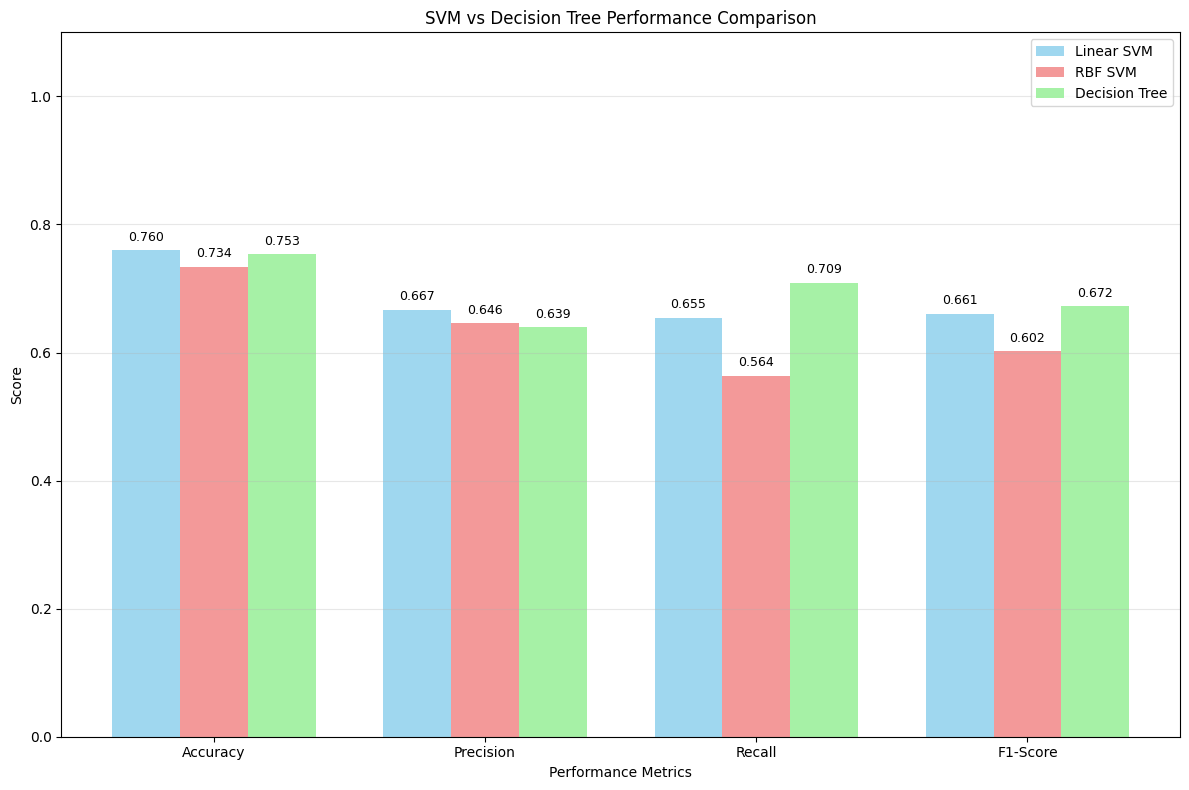

In [44]:
# Performance Visualization
plt.figure(figsize=(12, 8))

# Prepare data for visualization
models = comparison_df['Model']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['skyblue', 'lightcoral', 'lightgreen']

# Create grouped bar chart
x = np.arange(len(metrics))
width = 0.25

for i, model in enumerate(models):
    values = [comparison_df.iloc[i][metric] for metric in metrics]
    plt.bar(x + i*width, values, width, label=model, color=colors[i], alpha=0.8)
    
    # Add value labels on bars
    for j, v in enumerate(values):
        plt.text(x[j] + i*width, v + 0.01, f'{v:.3f}', 
                ha='center', va='bottom', fontsize=9)

plt.xlabel('Performance Metrics')
plt.ylabel('Score')
plt.title('SVM vs Decision Tree Performance Comparison')
plt.xticks(x + width, metrics)
plt.legend()
plt.ylim(0, 1.1)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## Inference

Based on the performance comparison between SVM classifiers and Decision Tree:
- **Linear SVM** achieved the highest accuracy (0.760) and precision (0.667).
- **Decision Tree** performed best in recall (0.709) and F1-score (0.672).
- **RBF SVM** had lower scores across all metrics compared to the other models.